# Import the basic libraries:

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the electronics dataset:
electronics=pd.read_csv("ratings_Electronics.csv",header=None)

In [3]:
# first look of the dataframe:
electronics.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
# renaming the columns of the dataframe:
colms={0:'userId',1:'productId',2:'Rating',3:'timestamp'}

In [5]:
electronics=electronics.rename(columns=colms) # getting the actually names of each attributes

In [6]:
# print first six rows with header names:
electronics.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [7]:
#shape of the data:
print("Electronic ratings dataset has {} rowns and {} columns".format(electronics.shape[0],electronics.shape[1]))

Electronic ratings dataset has 7824482 rowns and 4 columns


In [8]:
# Number of unique userids and products
print("There are {} unique User Id in the dataset".format(electronics['userId'].nunique()))
print('-'*100)
print("There are {} unique Product Id in the dataset".format(electronics['productId'].nunique()))
print('-'*100)
user_freq=pd.DataFrame(electronics['userId'].value_counts()).reset_index().rename(columns={'index':'userId','userId':'count_user'})


There are 4201696 unique User Id in the dataset
----------------------------------------------------------------------------------------------------
There are 476002 unique Product Id in the dataset
----------------------------------------------------------------------------------------------------


In [9]:
# adding the numbers of ratings given by a particular user :
electronics_merge = pd.merge(electronics, user_freq, on='userId',how='left')
electronics_merge.head()

,userId,productId,Rating,timestamp,count_user
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,2
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,4
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,1
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,1
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,1


In [10]:
# keeping only users with rating 50 or more:
electronics_clean=electronics_merge[electronics_merge['count_user']>=50]

In [11]:
#shape of the data:
print(" Cleansed version of Electronics dataset has {} rowns and {} columns".format(electronics_clean.shape[0],electronics_clean.shape[1]))
# Number of unique userids
print("There are {} unique User Id in the dataset".format(electronics_clean['userId'].nunique()))
print('-'*100)
print("There are {} unique Product Id in the dataset".format(electronics_clean['productId'].nunique()))
print('-'*100)

 Cleansed version of Electronics dataset has 125871 rowns and 5 columns
There are 1540 unique User Id in the dataset
----------------------------------------------------------------------------------------------------
There are 48190 unique Product Id in the dataset
----------------------------------------------------------------------------------------------------


In [12]:
electronics_clean.head()

,userId,productId,Rating,timestamp,count_user
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,50
118,AT09WGFUM934H,0594481813,3.0,1377907200,110
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600,72
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000,151
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200,58


# EDA

Text(0.5, 1.0, 'Frequency of Ratings')

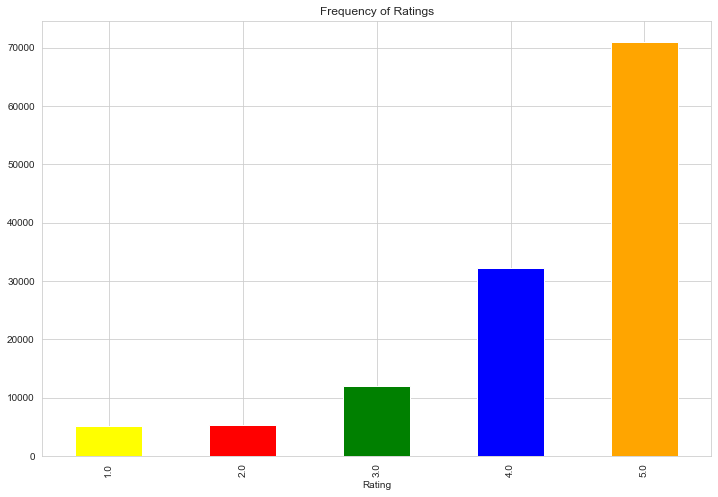

In [13]:
#barplot of ratings:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
electronics_clean.groupby("Rating").count()['userId'].plot(kind='bar',color=['yellow', 'red', 'green', 'blue', 'orange'])
plt.title("Frequency of Ratings")

 Majority of users who bought electonic item gave 4 and 5 stars to the product.

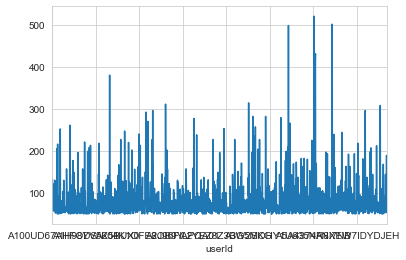

In [14]:
#Number of ratings given by a user:
electronics_clean.groupby("userId").count()['productId'].plot()

In [15]:
# Average rating given a user:
electronics_clean.groupby("userId").mean()['Rating']

userId
A100UD67AHFODS    4.508621
A100WO06OQR8BQ    3.651515
A105S56ODHGJEK    3.838235
A105TOJ6LTVMBG    3.845070
A10AFVU66A79Y1    4.184615
A10H24TDLK2VDP    4.421053
A10NMELR4KX0J6    4.125000
A10O7THJ2O20AG    4.975000
A10PEXB6XAQ5XF    4.028037
A10X9ME6R66JDX    4.661972
A10Y058K7B96C6    4.422764
A10ZBR6O8S8OCY    4.649351
A10ZFE6YE0UHW8    3.807692
A110PC8C5Y7MQD    3.894737
A110VKXAVLAYKY    4.200000
A111WCUF5KA2I6    4.846154
A1143YEAZYMYHJ    4.449438
A11D1KHM7DVOQK    3.125000
A11ED8O95W2103    4.044776
A11EXFO14WEJM1    4.360465
A11EYMH9UV9XG7    4.439394
A11FX8HL2ANK6T    4.306667
A11I1I9QLMAM1A    4.468293
A11IXJ8M1JO296    4.241379
A11KQADBYE0UZL    4.660000
A11KZ906QD08C5    4.458333
A11LNPG39A2ZV4    4.346154
A11OTLEDSW8ZXD    4.217391
A11P105WVK5240    4.537037
A11R5VW7IM6ISQ    4.400000
                    ...   
AWZR0O65DL2Q      4.157143
AX05DBU8IRUWY     4.068627
AX7317G153T8W     4.290909
AXP8GO5Q3AXSA     4.184615
AXR3CV6A4FMBG     4.145455
AXU3VKZE848IY     3.9

In [16]:
# Average rating to a particular product by all users purchased:
electronics_clean.groupby("productId").mean()['Rating']

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
1400501520    5.000000
1400501776    4.500000
1400532620    3.000000
1400532655    3.833333
140053271X    2.500000
1400599997    4.000000
1400698987    4.500000
1400699169    5.000000
1685560148    5.000000
3744295508    5.000000
7562434166    3.000000
787988002X    5.000000
8862935307    5.000000
8862936826    2.000000
9043413585    3.500000
9573212900    4.000000
9573212919    5.000000
9575871979    4.000000
9800359788    5.000000
9981719005    3.000000
9981734241    1.000000
9981739588    5.000000
9983722615    5.000000
998376234X    1.000000
9983891212    4.875000
                ...   
B00KWL62QI    5.000000
B00KWMNDDM    5.000000
B00KWPRSJY    5.000000
B00KWWY1PQ    5.000000
B00KXAFYZS    5.000000
B00KXMN08E    5.000000
B00KXUHX9S    5.000000
B00KYA7CT8    5.000000
B00KYMCJF8    4.750000
B00L0YFJHY    5.000000
B00L1I727Y    5.000000
B00L1I80K2    5.000000
B

# Popularity Based Recomdendation System:

In [17]:
#Top 20 Products recomendation based on popularity based on average ratings:
electronics_clean.groupby("productId")['Rating'].mean().sort_values(ascending=False).head(20)

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
B002R0T03Y    5.0
B002R20X9M    5.0
B002R2KACC    5.0
B002R4NN92    5.0
B002R5ABIW    5.0
B002R5UK9W    5.0
B002R6KZLO    5.0
B002R84J28    5.0
B002R8FSWS    5.0
B002R9D040    5.0
B002R9D054    5.0
B002RARGOO    5.0
B002RCDKVK    5.0
B002RCLW7Y    5.0
B002REBSGC    5.0
Name: Rating, dtype: float64

In [18]:
def top_n_recomendation(n):
    return electronics_clean.groupby("productId")['Rating'].mean().sort_values(ascending=False).head(n)

In [19]:
# Top 5 Recomendations based on product popularity:
top_n_recomendation(5)

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: Rating, dtype: float64

# Collaborative Filtering :

In [20]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Reader
from surprise import Dataset

In [21]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(electronics_clean[['userId', 'productId', 'Rating']], reader)

In [22]:
# Split the dataset into train and test set:
from surprise.model_selection.split import train_test_split

trainset,testset=train_test_split(data,test_size=0.80,random_state=1)

## User Based Collabrative Filtering Model:

## KNN with Means Model:

In [23]:
#getting the model:
algo=KNNWithMeans(k=50,sim_options={'name':'pearson_baseline','user_based':True},n_jobs=-1)

In [24]:
#training the model on trainset:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [25]:
#get the prediction:
uid = 'A17BUUBOU0598B'
iid = 'B006CFU61U'

algo.predict(uid,iid)

Prediction(uid='A17BUUBOU0598B', iid='B006CFU61U', r_ui=None, est=3.5, details={'actual_k': 0, 'was_impossible': False})

In [26]:
testset

[('A3L9E0YI7C5G0W', 'B00154CV6G', 3.0),
 ('A17BUUBOU0598B', 'B006CFU61U', 4.0),
 ('A3G5MOHY1U635N', 'B0092T7XY6', 4.0),
 ('A2PC9ZZIFV31B1', 'B00147ZSYQ', 2.0),
 ('A1AKW788238PWQ', 'B000WLW87A', 4.0),
 ('A1IU7S4HCK1XK0', 'B0054YQO5C', 5.0),
 ('AMWL7XIWIPXEZ', 'B005WMCZCC', 3.0),
 ('ABVYGB2TKBO8F', 'B000IWL77U', 3.0),
 ('A3EP26M3QHINXT', 'B006IKH58G', 5.0),
 ('A4IEUHNRFZO0', 'B000EWI8IK', 5.0),
 ('A2ZRG5NOFZ47RK', 'B000CKVOOY', 5.0),
 ('A1G650TTTHEAL5', 'B00K6ZI1HI', 5.0),
 ('A3IJL9A50KVVZ1', 'B005Z1E3IY', 5.0),
 ('AGYH5U11ZKPFB', 'B0000VYJRY', 5.0),
 ('A2BLFCOPSMBOZ9', 'B00EHZYWGM', 5.0),
 ('A4WEZJOIZIV4U', 'B003S6AXVO', 5.0),
 ('AW5JSQCHC2ZJO', 'B001FA1NZU', 4.0),
 ('A10ZFE6YE0UHW8', 'B00829TIEK', 4.0),
 ('A1PN2U0AWXGVML', 'B00200JZCC', 1.0),
 ('ATS2855497V0I', 'B004HO58KC', 3.0),
 ('AAQ9NJ480N9W5', 'B002IC0YL8', 4.0),
 ('A2SGAJWXG65464', 'B004J3ZV62', 1.0),
 ('A1AWL9JASMG904', 'B00008XOLT', 1.0),
 ('A2NYK9KWFMJV4Y', 'B00AK31M3G', 5.0),
 ('A1C5TCCR2IGKBU', 'B000L47AHG', 5.0),
 ('A1L1N3

In [27]:
# predict the ratings for testset:
predictions=algo.test(testset)

In [28]:
predictions

[Prediction(uid='A3L9E0YI7C5G0W', iid='B00154CV6G', r_ui=3.0, est=4.261102725033765, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A17BUUBOU0598B', iid='B006CFU61U', r_ui=4.0, est=3.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3G5MOHY1U635N', iid='B0092T7XY6', r_ui=4.0, est=4.261102725033765, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2PC9ZZIFV31B1', iid='B00147ZSYQ', r_ui=2.0, est=4.261102725033765, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1AKW788238PWQ', iid='B000WLW87A', r_ui=4.0, est=4.261102725033765, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1IU7S4HCK1XK0', iid='B0054YQO5C', r_ui=5.0, est=4.161290322580645, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AMWL7XIWIPXEZ', iid='B005WMCZCC', r_ui=3.0, est=4.261102725033765, details={'was_

In [29]:
# Performance of the model:
from surprise import accuracy
accuracy.rmse(predictions,verbose=True)

RMSE: 1.0488


1.0487795277907195

## SVD(Metrix Factorization) Model:

In [30]:
from surprise import SVD
#getting the model:
algo2=SVD()

In [31]:
#training the model on trainset:
algo2.fit(trainset)

In [32]:
#get the prediction:
uid = 'AYNAH993VDECT'
iid = 'B0007TLJU4'

algo2.predict(uid,iid)

Prediction(uid='AYNAH993VDECT', iid='B0007TLJU4', r_ui=None, est=4.198940320775389, details={'was_impossible': False})

In [33]:
# predict the ratings for testset:
predictions2=algo2.test(testset)

In [34]:
predictions2

[Prediction(uid='A3L9E0YI7C5G0W', iid='B00154CV6G', r_ui=3.0, est=4.4390538104773025, details={'was_impossible': False}),
 Prediction(uid='A17BUUBOU0598B', iid='B006CFU61U', r_ui=4.0, est=3.7628209740192267, details={'was_impossible': False}),
 Prediction(uid='A3G5MOHY1U635N', iid='B0092T7XY6', r_ui=4.0, est=4.30708632516266, details={'was_impossible': False}),
 Prediction(uid='A2PC9ZZIFV31B1', iid='B00147ZSYQ', r_ui=2.0, est=4.225896345982784, details={'was_impossible': False}),
 Prediction(uid='A1AKW788238PWQ', iid='B000WLW87A', r_ui=4.0, est=4.301765407570765, details={'was_impossible': False}),
 Prediction(uid='A1IU7S4HCK1XK0', iid='B0054YQO5C', r_ui=5.0, est=4.078174600506857, details={'was_impossible': False}),
 Prediction(uid='AMWL7XIWIPXEZ', iid='B005WMCZCC', r_ui=3.0, est=3.988971960733029, details={'was_impossible': False}),
 Prediction(uid='ABVYGB2TKBO8F', iid='B000IWL77U', r_ui=3.0, est=4.292133517443389, details={'was_impossible': False}),
 Prediction(uid='A3EP26M3QHINXT',

In [35]:
# Performance of the model:
from surprise import accuracy
accuracy.rmse(predictions2,verbose=True)

RMSE: 1.0074


1.0073931201597135

# Cross Validation:

In [36]:
# now use Cross Validation to see how our model perform in general:

In [37]:
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):

    # train and test algorithm on knnwithMean
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0605
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0597
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0506


In [38]:
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
kf = KFold(n_splits=3)
# Cross Validation scoring on SVD Model
cross_validate(algo2,data,cv=kf,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9908  0.9791  0.9876  0.9858  0.0049  
MAE (testset)     0.7328  0.7251  0.7328  0.7302  0.0036  
Fit time          11.10   10.15   10.20   10.49   0.44    
Test time         0.78    0.57    0.76    0.70    0.10    


{'test_rmse': array([0.99083167, 0.97909872, 0.9875721 ]),
 'test_mae': array([0.73275249, 0.72506469, 0.73284164]),
 'fit_time': (11.101603269577026, 10.149270296096802, 10.204274654388428),
 'test_time': (0.7842376232147217, 0.5672199726104736, 0.7576808929443359)}

In [39]:
from collections import defaultdict

def top_n_recomendation(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [40]:
#Top 5 prdictions based on SVD:
top_n_recomendation(predictions2,5)

defaultdict(list,
            {'A3L9E0YI7C5G0W': [('B0019EHU8G', 5),
              ('B000QUUFRW', 4.967251270384461),
              ('B003ES5ZUU', 4.894690794559964),
              ('B001TH7GUU', 4.865667819851789),
              ('B0011ZK6PC', 4.78171383188442)],
             'A17BUUBOU0598B': [('B0031ESKJA', 3.9939489250760927),
              ('B00426C57O', 3.909631387682292),
              ('B0012GK3MQ', 3.904821247626572),
              ('B000TKHBDK', 3.8975585181118664),
              ('B000TKHGL2', 3.8695097876091165)],
             'A3G5MOHY1U635N': [('B008LCYIEI', 4.69997673373118),
              ('B002Y6CJJ8', 4.614557221396899),
              ('B000BTL0OA', 4.603602903146941),
              ('B000204SWE', 4.577726906369387),
              ('B0007A1IRC', 4.52015454380147)],
             'A2PC9ZZIFV31B1': [('B002V88HFE', 4.796857739719813),
              ('B001TH7GUU', 4.737961429656592),
              ('B007WTAJTO', 4.389125565943534),
              ('B0044YPN0A', 4.3643707317

In [41]:
# Top 5 Recommendations:
get_recomendation=top_n_recomendation(predictions2,5)

In [43]:
# get the top 5 recomendation based on user habit:
get_recomendation.get('A29GWIJL72GXXZ')

[('B000PDQLF0', 4.3585603637569745),
 ('B001E1Y5O6', 4.3196061037722036),
 ('B002V8C3W2', 4.317902836911683),
 ('B00076FVP6', 4.194645868202458),
 ('B001M56DI0', 4.065911475103264)]

In [44]:
# Print the recommended items for each user
for uid, user_ratings in get_recomendation.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3L9E0YI7C5G0W ['B0019EHU8G', 'B000QUUFRW', 'B003ES5ZUU', 'B001TH7GUU', 'B0011ZK6PC']
A17BUUBOU0598B ['B0031ESKJA', 'B00426C57O', 'B0012GK3MQ', 'B000TKHBDK', 'B000TKHGL2']
A3G5MOHY1U635N ['B008LCYIEI', 'B002Y6CJJ8', 'B000BTL0OA', 'B000204SWE', 'B0007A1IRC']
A2PC9ZZIFV31B1 ['B002V88HFE', 'B001TH7GUU', 'B007WTAJTO', 'B0044YPN0A', 'B00001P4ZH']
A1AKW788238PWQ ['B00104XCVO', 'B005D5M136', 'B002LARRDK', 'B000JNQSIQ', 'B0025VKUQ6']
A1IU7S4HCK1XK0 ['B000N99BBC', 'B00005AT7Y', 'B002VPE1WK', 'B0009K9Q1A', 'B00BW6KCTU']
AMWL7XIWIPXEZ ['B004QBUL1C', 'B003VAK16O', 'B000GQMHBI', 'B000HCT12O', 'B0076W9Q5A']
ABVYGB2TKBO8F ['B002WE6D44', 'B0088PUEPK', 'B002YU83YO', 'B0036Q7MV0', 'B008RJZQSW']
A3EP26M3QHINXT ['B000N99BBC', 'B0043M9AU2', 'B0047EE0XS', 'B00BW6KCTU', 'B00004SABB']
A4IEUHNRFZO0 ['B0012Y2LLE', 'B0000BZL1P', 'B00CCKDOYU', 'B002GR1YZ0', 'B003ZUIHY8']
A2ZRG5NOFZ47RK ['B002V88HFE', 'B0043WJRRS', 'B007WTAJTO', 'B006Y0YZZ6', 'B0000BZL1P']
A1G650TTTHEAL5 ['B008EQYRRY', 'B004HHICKC', 'B000CKVOOY', 

# Summary:
- We used two models from surprise library out of them SVD performed much better because RMSE is comparatively lesser as compared to KNNwithMeans.while building the model i found **Gray Sheep** problem is present as model was giving "was_impossible" as True.

- For **Cold Start** we could use Popularity based model.

- Also I found via visualization that since majority of the ratings given by users was either 4 or 5,hence all the predictions of ratings are **baised** towards ratings 4 or 5(which i observed).